# Noite 2017-11-17 - Arquivos de calibracao
Reducao de dados de espectroscopia no visivel de asteroides da familia de asteroides Lixiahoua, obtidos com GOODMAN no SOAR 

### path dos dados comprimidos

In [1]:
datapath = '/home/mario/projetos/espectros/soar/lixis/2017-11-17'

### importando modulos

In [2]:
%matplotlib inline
import os
import shutil
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import spectool

## Extraindo os dados e organizando em pastas a partir do valor "object" no header

In [3]:
# extraindo dados comprimidos
spectool.decompress(dirpath=datapath)

In [4]:
# organizando em pastas
spectool.reduc.organize_by_object(dirpath=datapath)

In [5]:
# imprime diretorios criados
os.system('mv {0}/Dome_Flat_80% {0}/flat'.format(datapath))
!ls $datapath

106085	297403	39260	    dummy  hyades64    l115-271-2  l98-978-2	 ZERO
138668	34339	56970	    flat   hyades64-2  l93-101	   Ne
18483	39094	compressed  HgAr   l115-271    l98-978	   object_empty


## BIAS

In [6]:
# definindo o diretorio para os arquivos de bias
biaspath = datapath+'/ZERO'

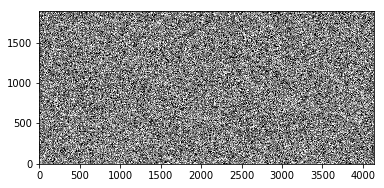

0083_SO2017B-015_1117 0.0 498.707264983 2.69822273458


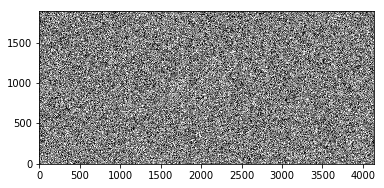

0084_SO2017B-015_1117 0.0 498.698876845 3.12126884614


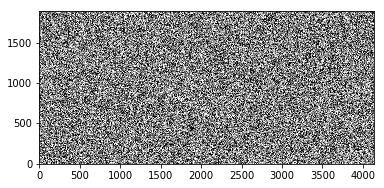

0086_SO2017B-015_1117 0.0 498.695416741 2.04976319188


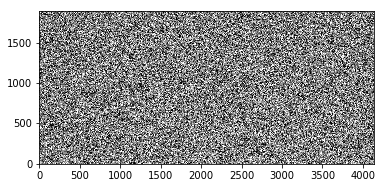

0094_SO2017B-015_1117 0.0 498.696965148 2.13807292027


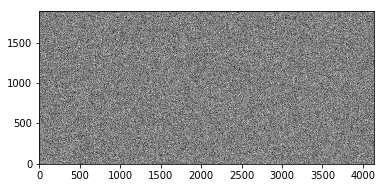

0092_SO2017B-015_1117 0.0 498.700187006 7.00736085929


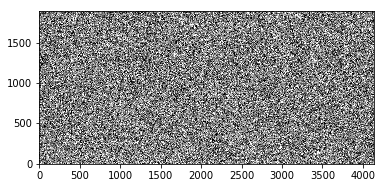

0095_SO2017B-015_1117 0.0 498.697580054 2.39515118778


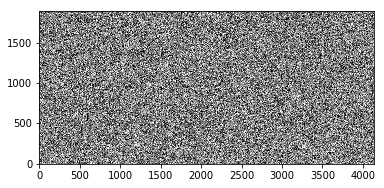

0093_SO2017B-015_1117 0.0 498.69645453 2.5328307804


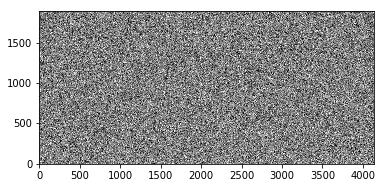

0090_SO2017B-015_1117 0.0 498.703581914 3.52627649402


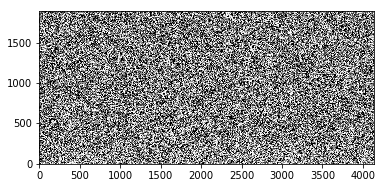

0081_SO2017B-015_1117 0.0 498.729705553 1.57653381099


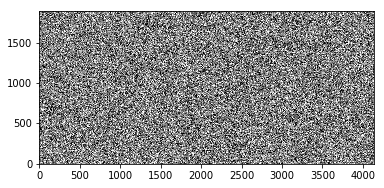

0085_SO2017B-015_1117 0.0 498.703948387 2.44380556176


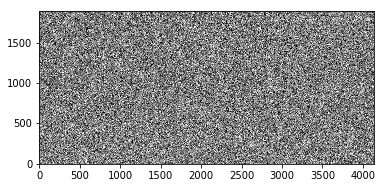

0088_SO2017B-015_1117 0.0 498.697827977 3.05067943887


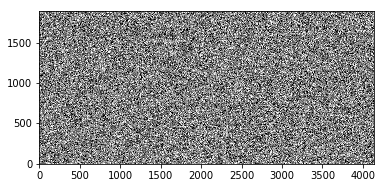

0089_SO2017B-015_1117 0.0 498.697933029 2.67107147153


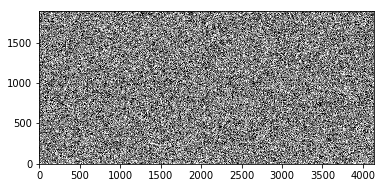

0091_SO2017B-015_1117 0.0 498.698050815 2.70780885587


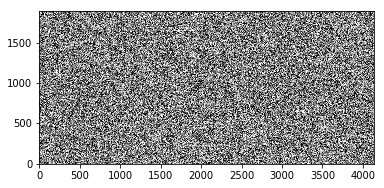

0082_SO2017B-015_1117 0.0 498.699220143 2.06955901045


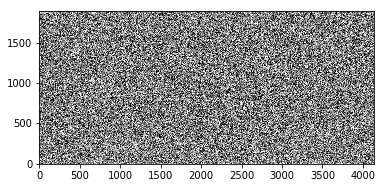

0087_SO2017B-015_1117 0.0 498.69786274 2.21437229749


In [7]:
# checando as imagens de bias
bias = glob(biaspath+'/0*.fits')
for im in bias:
    img = spectool.Image(im)
    #imprimindo path e contagem média da imagem
    img.view()
    print img.name, img.texp, np.mean(img.arr), np.std(img.arr)


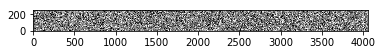

t0083_SO2017B-015_1117.fits 0.0 498.693360591 2.88782306013


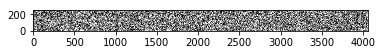

t0084_SO2017B-015_1117.fits 0.0 498.684919212 2.38197913289


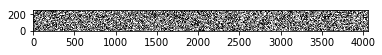

t0086_SO2017B-015_1117.fits 0.0 498.685664039 2.24545952321


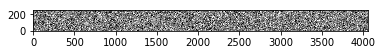

t0094_SO2017B-015_1117.fits 0.0 498.690127094 3.09249679343


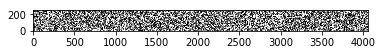

t0092_SO2017B-015_1117.fits 0.0 498.678733005 1.43219674552


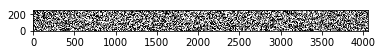

t0095_SO2017B-015_1117.fits 0.0 498.68406601 1.59110318936


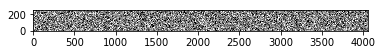

t0093_SO2017B-015_1117.fits 0.0 498.687318227 2.6898373896


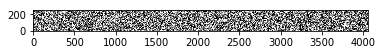

t0090_SO2017B-015_1117.fits 0.0 498.686742857 1.52473013421


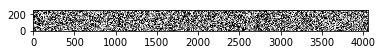

t0081_SO2017B-015_1117.fits 0.0 498.694106404 1.66628862381


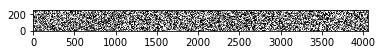

t0085_SO2017B-015_1117.fits 0.0 498.692162562 1.55001021868


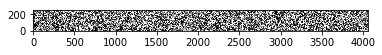

t0088_SO2017B-015_1117.fits 0.0 498.682599015 1.31976168314


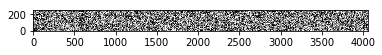

t0089_SO2017B-015_1117.fits 0.0 498.687435468 1.92530183534


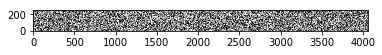

t0091_SO2017B-015_1117.fits 0.0 498.683634483 2.18154520019


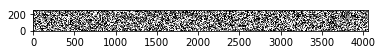

t0082_SO2017B-015_1117.fits 0.0 498.684691626 1.49591079345


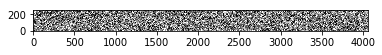

t0087_SO2017B-015_1117.fits 0.0 498.691018719 2.0828207774


In [8]:
# trimming imagens 
for img in bias:
    timg = spectool.reduc.calib.trim(img, plot=True)
    print timg.name, timg.texp, np.mean(timg.arr), np.std(timg.arr)

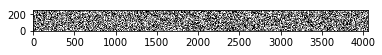

/home/mario/projetos/espectros/soar/lixis/2017-11-17/ZERO/mbias.fits
mbias.fits 0.0 498.687105287 0.536585157405


In [9]:
# combining bias
mbias = spectool.reduc.calib.combine(bias, 'mbias.fits', prefix='t', plot=True)
# fixating mbias path
mbiasfile = mbias.path
print mbiasfile
print mbias.name, mbias.texp, np.mean(mbias.arr), np.std(mbias.arr)

## FLAT

In [10]:
# checando os modos de observacao do flat
!ls $datapath/flat/400_m2

0068_SO2017B-015_1117.fits    bt0075_SO2017B-015_1117.fits
0069_SO2017B-015_1117.fits    bt0076_SO2017B-015_1117.fits
0070_SO2017B-015_1117.fits    bt0077_SO2017B-015_1117.fits
0071_SO2017B-015_1117.fits    errado
0072_SO2017B-015_1117.fits    flat.fits
0073_SO2017B-015_1117.fits    mflatm2.fits
0074_SO2017B-015_1117.fits    t0068_SO2017B-015_1117.fits
0075_SO2017B-015_1117.fits    t0069_SO2017B-015_1117.fits
0076_SO2017B-015_1117.fits    t0070_SO2017B-015_1117.fits
0077_SO2017B-015_1117.fits    t0071_SO2017B-015_1117.fits
bt0068_SO2017B-015_1117.fits  t0072_SO2017B-015_1117.fits
bt0069_SO2017B-015_1117.fits  t0073_SO2017B-015_1117.fits
bt0070_SO2017B-015_1117.fits  t0074_SO2017B-015_1117.fits
bt0071_SO2017B-015_1117.fits  t0075_SO2017B-015_1117.fits
bt0072_SO2017B-015_1117.fits  t0076_SO2017B-015_1117.fits
bt0073_SO2017B-015_1117.fits  t0077_SO2017B-015_1117.fits
bt0074_SO2017B-015_1117.fits


In [11]:
# comecando pelo modo m2
flatpath_m2 = datapath+'/flat/400_m2'

In [12]:
# checando as imagens de bias
flatm2 = glob(flatpath_m2+'/0*.fits')
for im in flatm2:
    img = spectool.Image(im)
    #imprimindo path e contagem média da imagem
    print img.name, img.object, img.texp, img.slit, np.mean(img.arr)

0070_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11294.1495103
0074_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11311.5093736
0077_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11288.4874795
0073_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11305.6149047
0071_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11309.6420307
0076_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11310.659794
0072_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11298.2004162
0075_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11297.4724168
0069_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11291.2418066
0068_SO2017B-015_1117 Dome_Flat_80% 20.0 1.5"_long_slit 11285.0222293


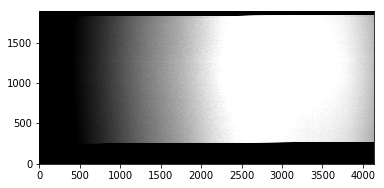

0070_SO2017B-015_1117 20.0 11294.1495103 7159.03521736


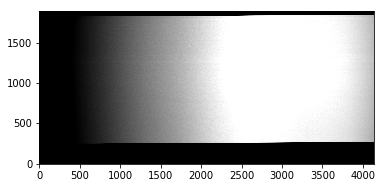

0074_SO2017B-015_1117 20.0 11311.5093736 7169.89479444


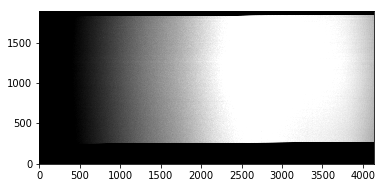

0077_SO2017B-015_1117 20.0 11288.4874795 7155.59730361


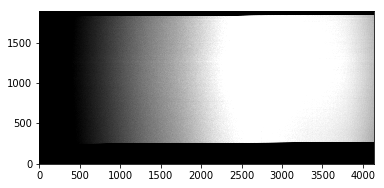

0073_SO2017B-015_1117 20.0 11305.6149047 7166.33109944


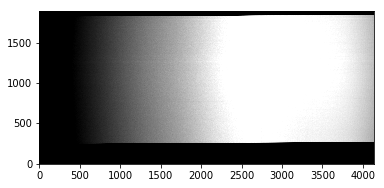

0071_SO2017B-015_1117 20.0 11309.6420307 7168.3962646


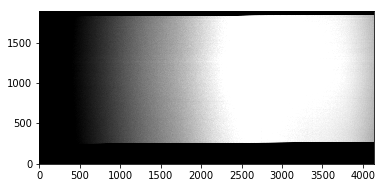

0076_SO2017B-015_1117 20.0 11310.659794 7169.24457033


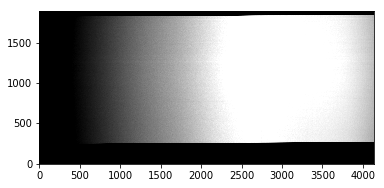

0072_SO2017B-015_1117 20.0 11298.2004162 7161.58963995


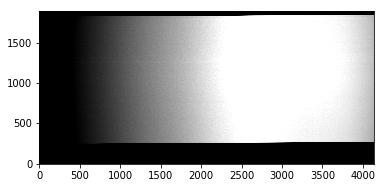

0075_SO2017B-015_1117 20.0 11297.4724168 7161.38296733


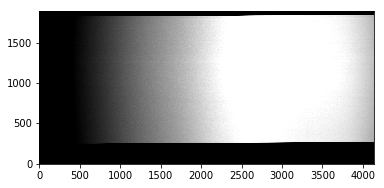

0069_SO2017B-015_1117 20.0 11291.2418066 7157.58814864


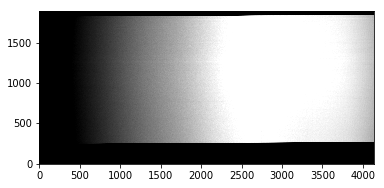

0068_SO2017B-015_1117 20.0 11285.0222293 7153.31773093


In [13]:
# Na noite de observacao fizemos flatfields com o slit de 0.45(por engano). 
# Posteriormente corrigimos e fizemos com o de 1.5. Entao agora selecionando apenas o de 1.5 
flatcerto = []
flaterrado = []
for im in flatm2:
    img = spectool.Image(im)
    #imprimindo path e contagem média da imagem
    if img.texp == 20.0 and img.slit == '1.5"_long_slit':
        img.view()
        print img.name, img.texp, np.mean(img.arr),  np.std(img.arr)
        flatcerto.append(img.path)
    else:
        # aproveitando e movendo os flats errados para outra pasta
        if not os.path.exists(flatpath_m2+'/errado'):
            os.mkdir(flatpath_m2+'/errado')
        shutil.move(img.path, flatpath_m2+'/errado/'+img.name)    

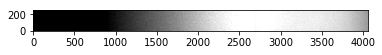

bt0070_SO2017B-015_1117.fits 20.0 13432.134012 5821.48207306


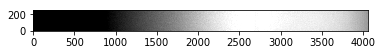

bt0074_SO2017B-015_1117.fits 20.0 13453.6001883 5829.77620471


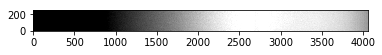

bt0077_SO2017B-015_1117.fits 20.0 13425.1682957 5818.90115884


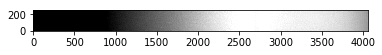

bt0073_SO2017B-015_1117.fits 20.0 13446.375275 5827.19508456


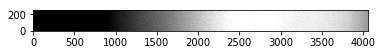

bt0071_SO2017B-015_1117.fits 20.0 13451.3050514 5828.39441319


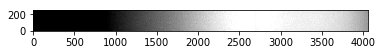

bt0076_SO2017B-015_1117.fits 20.0 13452.730411 5829.13899275


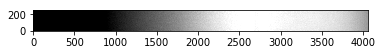

bt0072_SO2017B-015_1117.fits 20.0 13437.0524317 5823.38936849


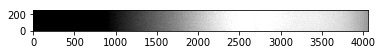

bt0075_SO2017B-015_1117.fits 20.0 13436.2121312 5823.47630954


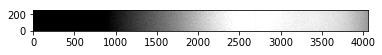

bt0069_SO2017B-015_1117.fits 20.0 13428.6774425 5820.68776789


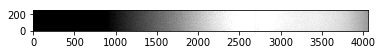

bt0068_SO2017B-015_1117.fits 20.0 13420.7580041 5817.15534383


In [14]:
# trimming images and removing bias
for img in flatcerto:
    timg = spectool.reduc.calib.trim(img)
    btimg = spectool.reduc.calib.biascorrect(timg.path, mbiasfile, plot=True)
    print btimg.name, btimg.texp, np.mean(btimg.arr), np.std(btimg.arr)

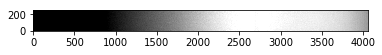

flat.fits 20.0 13438.4013243 5823.70756893


In [15]:
# combinando flats
flat = spectool.reduc.calib.combine(flatcerto, 'flat.fits', prefix='bt', plot=True)
print flat.name, flat.texp, np.mean(flat.arr), np.std(flat.arr)


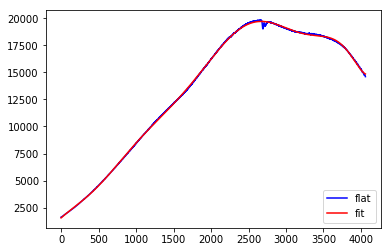

In [16]:
#normalizando -> verificando ajuste
mflat = spectool.reduc.calib.flatnormalize(flat.path, 'mflatm2.fits', order=10, 
                                               plotfit=True, plotimg=False, save=False)


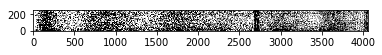

mflatm2.fits 20.0 1.00002807897 0.0139220768562
/home/mario/projetos/espectros/soar/lixis/2017-11-17/flat/400_m2/mflatm2.fits


In [17]:
#normalizando -> salvando
mflat.view()
mflat.saveimg(mflat.path)
print mflat.name, mflat.texp, np.mean(mflat.arr), np.std(mflat.arr)
mflatfile = mflat.path
print mflatfile


# Arc

In [18]:
#Como nesta noite observamos apenas no modo m2, vamos utilizar apenas os arcos de Ne
!ls $datapath/Ne/400_m2

0078_SO2017B-015_1117.fits     fbt0079_SO2017B-015_1117.fits
0079_SO2017B-015_1117.fits     fbt0080_SO2017B-015_1117.fits
0080_SO2017B-015_1117.fits     outros
bt0078_SO2017B-015_1117.fits   t0078_SO2017B-015_1117.fits
bt0079_SO2017B-015_1117.fits   t0079_SO2017B-015_1117.fits
bt0080_SO2017B-015_1117.fits   t0080_SO2017B-015_1117.fits
fbt0078_SO2017B-015_1117.fits


In [19]:
# removendo arquivos errados
!mkdir $datapath/Ne/400_m2/outros
!mv $datapath/Ne/400_m2/0*_focus* $datapath/Ne/400_m2/outros
!mv $datapath/Ne/400_m2/0036_dummy* $datapath/Ne/400_m2/outros
!ls $datapath/Ne/400_m2

mkdir: cannot create directory ‘/home/mario/projetos/espectros/soar/lixis/2017-11-17/Ne/400_m2/outros’: File exists
mv: cannot stat '/home/mario/projetos/espectros/soar/lixis/2017-11-17/Ne/400_m2/0*_focus*': No such file or directory
mv: cannot stat '/home/mario/projetos/espectros/soar/lixis/2017-11-17/Ne/400_m2/0036_dummy*': No such file or directory
0078_SO2017B-015_1117.fits     fbt0079_SO2017B-015_1117.fits
0079_SO2017B-015_1117.fits     fbt0080_SO2017B-015_1117.fits
0080_SO2017B-015_1117.fits     outros
bt0078_SO2017B-015_1117.fits   t0078_SO2017B-015_1117.fits
bt0079_SO2017B-015_1117.fits   t0079_SO2017B-015_1117.fits
bt0080_SO2017B-015_1117.fits   t0080_SO2017B-015_1117.fits
fbt0078_SO2017B-015_1117.fits


In [20]:
# definindo caminho
ne_m2 = datapath+'/Ne/400_m2'

/home/mario/projetos/espectros/soar/lixis/2017-11-17/Ne/400_m2/0078_SO2017B-015_1117.fits


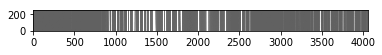

fbt0078_SO2017B-015_1117.fits 1.0 330.185224085
/home/mario/projetos/espectros/soar/lixis/2017-11-17/Ne/400_m2/0080_SO2017B-015_1117.fits


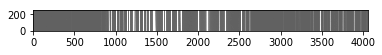

fbt0080_SO2017B-015_1117.fits 1.0 327.750875687
/home/mario/projetos/espectros/soar/lixis/2017-11-17/Ne/400_m2/0079_SO2017B-015_1117.fits


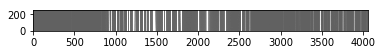

fbt0079_SO2017B-015_1117.fits 1.0 332.875035823


In [25]:
# trimming images and removing bias and correcting flat
ne = glob(ne_m2+'/0*.fits')
for img in ne:
    print img
    timg = spectool.reduc.calib.trim(img)
    btimg = spectool.reduc.calib.biascorrect(timg.path, mbiasfile)
    fbtimg = spectool.reduc.calib.flatcorrect(btimg.path, mflatfile, plot=True)
    print fbtimg.name, fbtimg.texp, np.mean(fbtimg.arr)